# Project Description

The dataset is related to red and white variants of the Portuguese "Vinho Verde" wine. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

This dataset can be viewed as classification task. The classes are ordered and not balanced (e.g. there are many more normal wines than excellent or poor ones). Also, we are not sure if all input variables are relevant. So it could be interesting to test feature selection methods


# Import Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
import sklearn


import warnings                                    
warnings.filterwarnings('ignore')

# Importing Dataset

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Red%20Wine/winequality-red.csv')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
df.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


# Data Cleaning

checking for all the null values in columns

In [5]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [6]:
df.isnull().sum().sum()

0

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


# Expolatory Data Analysis (EDA)

In [8]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [9]:
df.shape

(1599, 12)

In [10]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [11]:
df.columns.tolist()

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'quality']

In [12]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

<Axes: >

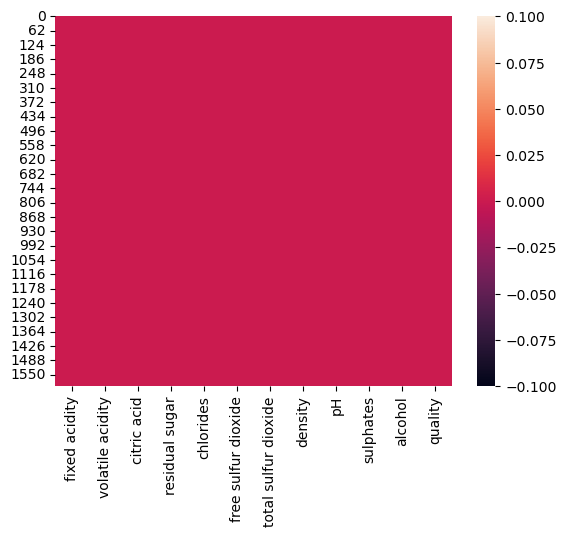

In [13]:
sns.heatmap(df.isnull())

In [14]:
df.nunique()

fixed acidity            96
volatile acidity        143
citric acid              80
residual sugar           91
chlorides               153
free sulfur dioxide      60
total sulfur dioxide    144
density                 436
pH                       89
sulphates                96
alcohol                  65
quality                   6
dtype: int64

In [15]:
for i in df.columns:
    print(df[i].value_counts())
    print('\n')

fixed acidity
7.2     67
7.1     57
7.8     53
7.5     52
7.0     50
        ..
13.5     1
13.8     1
13.4     1
4.7      1
5.5      1
Name: count, Length: 96, dtype: int64


volatile acidity
0.600    47
0.500    46
0.430    43
0.590    39
0.360    38
         ..
1.035     1
0.565     1
1.130     1
1.115     1
1.090     1
Name: count, Length: 143, dtype: int64


citric acid
0.00    132
0.49     68
0.24     51
0.02     50
0.26     38
       ... 
0.72      1
0.62      1
0.75      1
1.00      1
0.78      1
Name: count, Length: 80, dtype: int64


residual sugar
2.00     156
2.20     131
1.80     129
2.10     128
1.90     117
        ... 
4.25       1
2.85       1
3.45       1
2.35       1
13.90      1
Name: count, Length: 91, dtype: int64


chlorides
0.080    66
0.074    55
0.076    51
0.078    51
0.084    49
         ..
0.108     1
0.148     1
0.143     1
0.222     1
0.230     1
Name: count, Length: 153, dtype: int64


free sulfur dioxide
6.0     138
5.0     104
10.0     79
15.0     78
12

In [16]:
df.shape[0]

1599

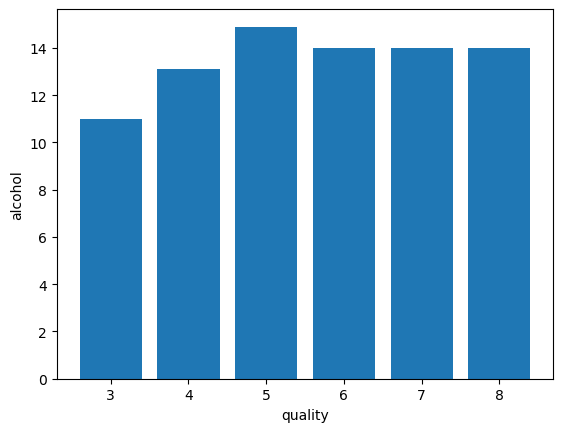

In [17]:
plt.bar(df['quality'], df['alcohol'])
plt.xlabel('quality')
plt.ylabel('alcohol')
plt.show()

# Correlation

In [18]:
# Checking the Correlation with respect to target variable(quality):-

df.corr()['quality'].sort_values()

volatile acidity       -0.390558
total sulfur dioxide   -0.185100
density                -0.174919
chlorides              -0.128907
pH                     -0.057731
free sulfur dioxide    -0.050656
residual sugar          0.013732
fixed acidity           0.124052
citric acid             0.226373
sulphates               0.251397
alcohol                 0.476166
quality                 1.000000
Name: quality, dtype: float64

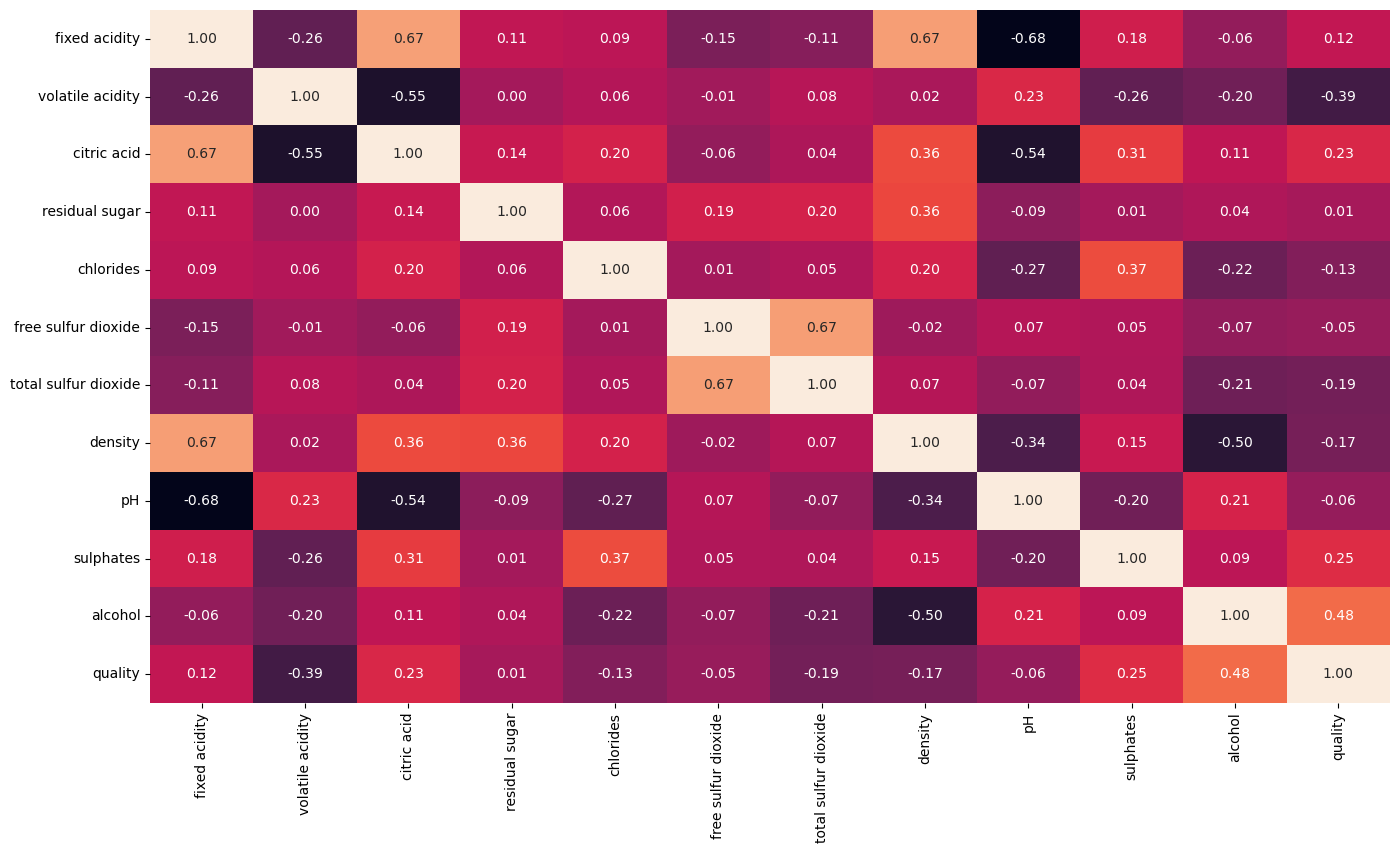

In [19]:
plt.figure(figsize=(16,9))
sns.heatmap(df.corr(),annot=True,fmt='0.2f',cbar=False)
plt.show()

In [20]:
df=df.drop('total sulfur dioxide',axis=1)

In [21]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,0.99547,3.57,0.71,10.2,5


In [22]:
df.shape

(1599, 11)

# Checking for skewness

In [23]:
df.skew()

fixed acidity          0.982751
volatile acidity       0.671593
citric acid            0.318337
residual sugar         4.540655
chlorides              5.680347
free sulfur dioxide    1.250567
density                0.071288
pH                     0.193683
sulphates              2.428672
alcohol                0.860829
quality                0.217802
dtype: float64

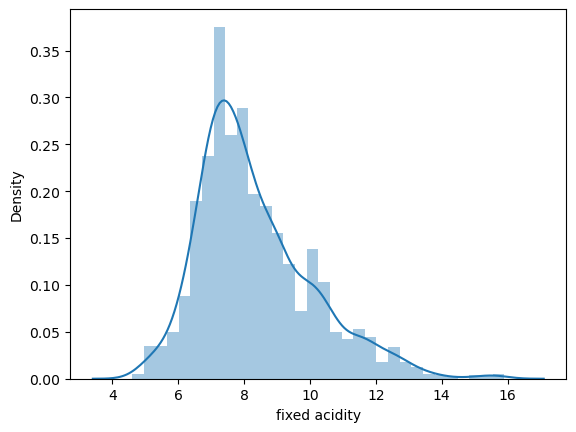

In [24]:
# checking with the distribution curve:-

sns.distplot(df['fixed acidity'])
plt.show()

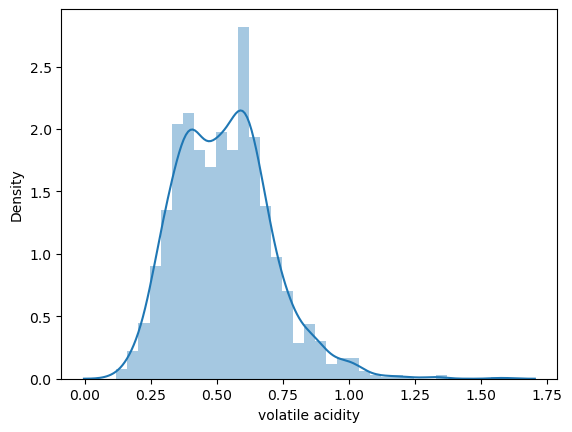

In [25]:
sns.distplot(df['volatile acidity'])
plt.show()

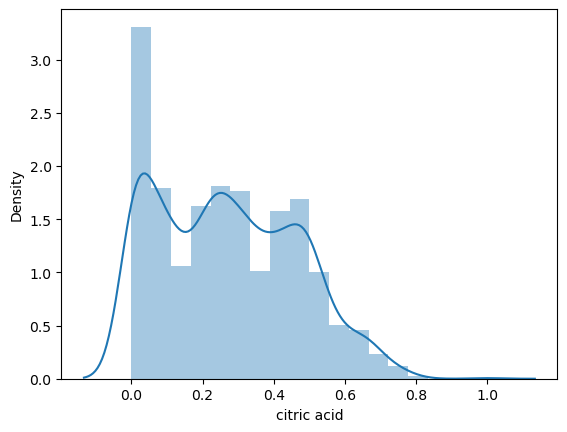

In [26]:
sns.distplot(df['citric acid'])
plt.show()

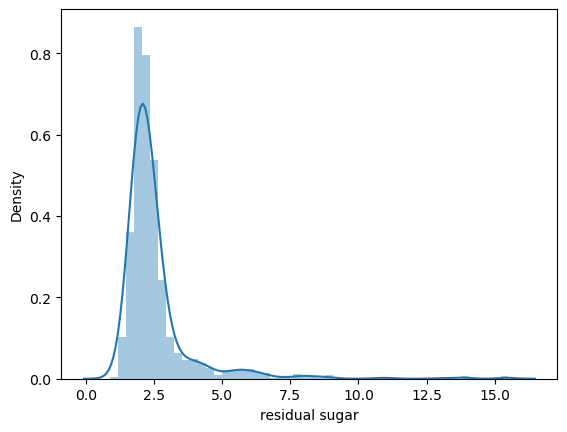

In [27]:
sns.distplot(df['residual sugar'])
plt.show()

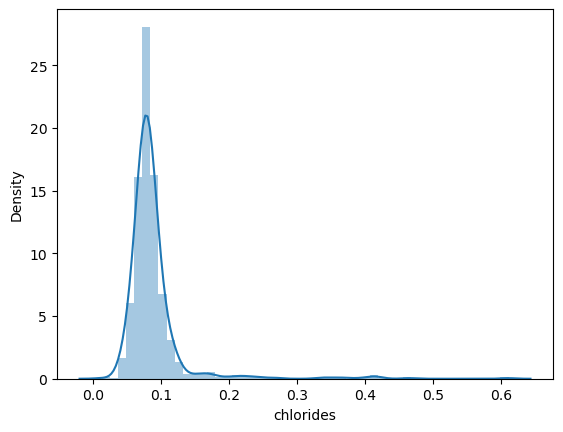

In [28]:
sns.distplot(df['chlorides'])
plt.show()

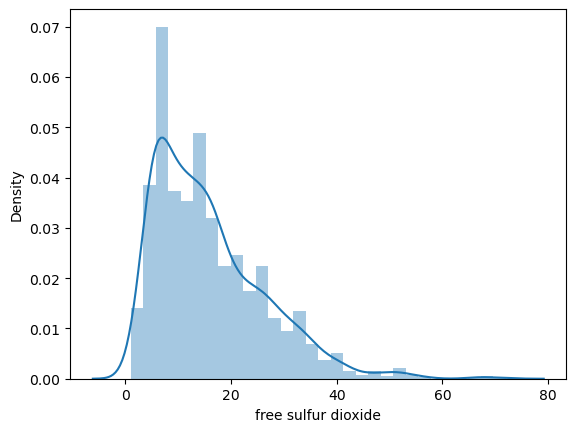

In [29]:
sns.distplot(df['free sulfur dioxide'])
plt.show()

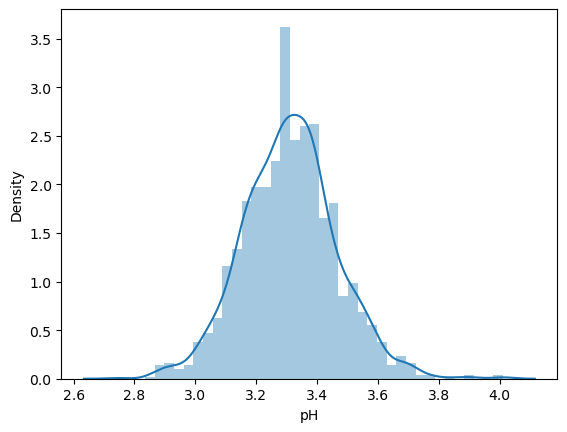

In [30]:
sns.distplot(df['pH'])
plt.show()

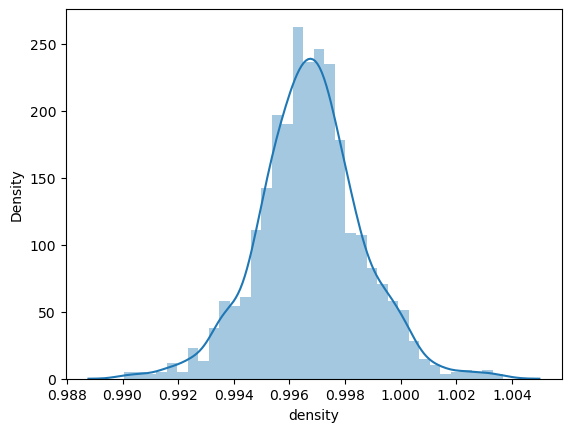

In [31]:
sns.distplot(df['density'])
plt.show()

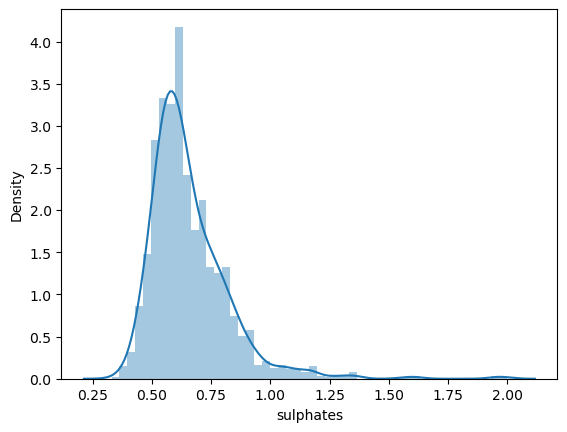

In [32]:
sns.distplot(df['sulphates'])
plt.show()

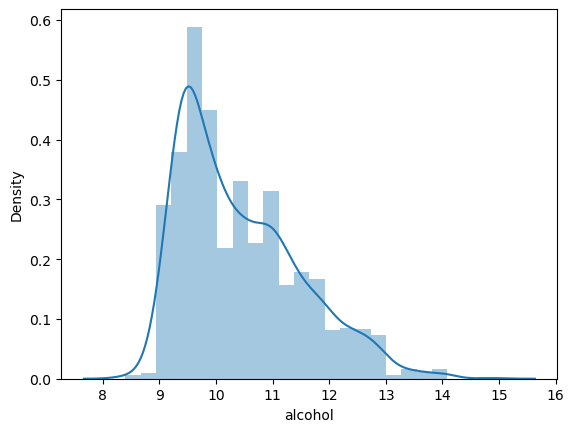

In [33]:
sns.distplot(df['alcohol'])
plt.show()

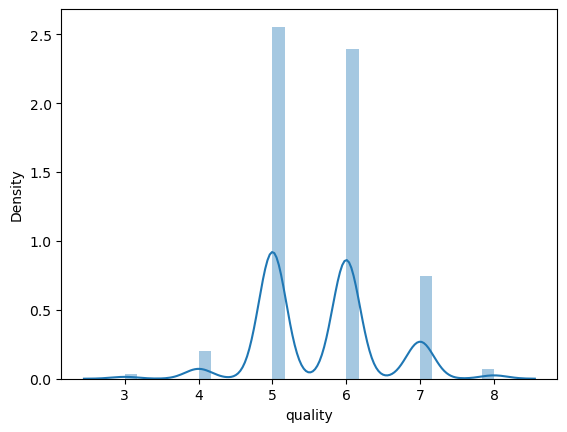

In [34]:
sns.distplot(df['quality'])
plt.show()

# Outliers Removal

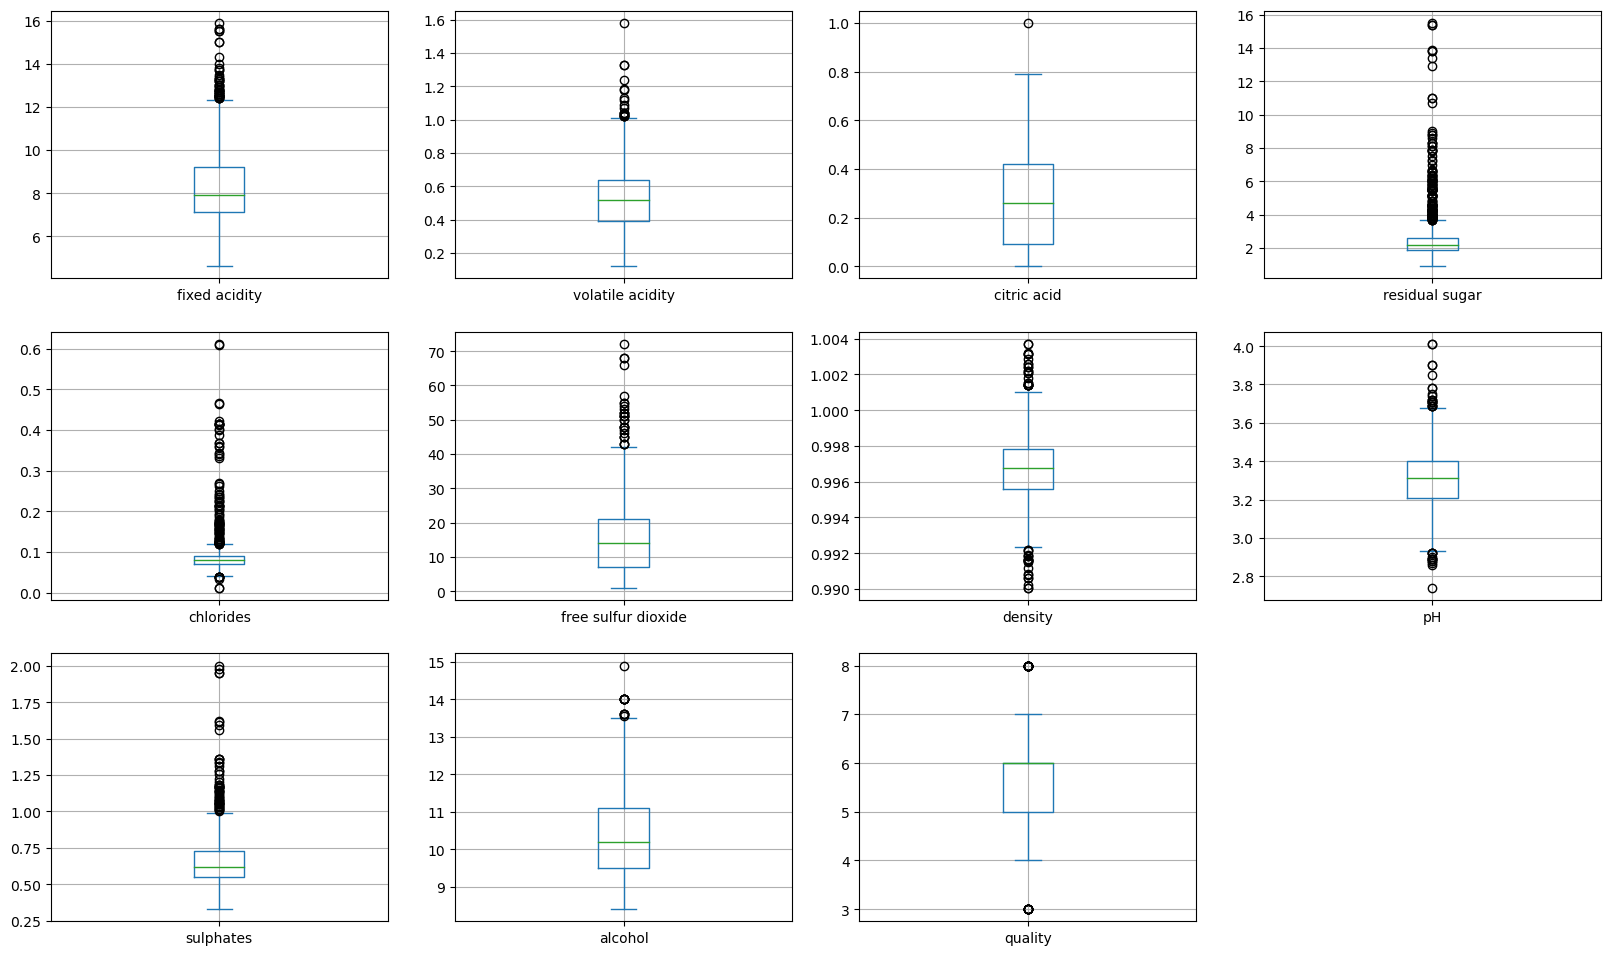

In [35]:
df.plot(kind='box',subplots=True,layout=(4,4),figsize=(20,16),grid=True)
plt.show()

In [36]:
from scipy.stats import zscore
z=np.abs(zscore(df))
z

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.528360,0.961877,1.391472,0.453218,0.243707,0.466193,0.558274,1.288643,0.579207,0.960246,0.787823
1,0.298547,1.967442,1.391472,0.043416,0.223875,0.872638,0.028261,0.719933,0.128950,0.584777,0.787823
2,0.298547,1.297065,1.186070,0.169427,0.096353,0.083669,0.134264,0.331177,0.048089,0.584777,0.787823
3,1.654856,1.384443,1.484154,0.453218,0.264960,0.107592,0.664277,0.979104,0.461180,0.584777,0.450848
4,0.528360,0.961877,1.391472,0.453218,0.243707,0.466193,0.558274,1.288643,0.579207,0.960246,0.787823
...,...,...,...,...,...,...,...,...,...,...,...
1594,1.217796,0.403229,0.980669,0.382271,0.053845,1.542054,0.978765,0.899886,0.461180,0.072294,0.787823
1595,1.390155,0.123905,0.877968,0.240375,0.541259,2.211469,0.862162,1.353436,0.601055,0.729364,0.450848
1596,1.160343,0.099554,0.723916,0.169427,0.243707,1.255161,0.533554,0.705508,0.542042,0.541630,0.450848
1597,1.390155,0.654620,0.775267,0.382271,0.264960,1.542054,0.676657,1.677400,0.305990,0.209308,0.787823


In [37]:
# index no.

np.where(z>3)

(array([  13,   14,   15,   17,   17,   19,   33,   38,   42,   43,   45,
          57,   81,   81,   83,   86,   88,   91,   92,   95,  106,  106,
         120,  126,  127,  142,  144,  147,  151,  151,  151,  151,  163,
         164,  169,  169,  181,  199,  226,  226,  240,  243,  244,  258,
         258,  274,  281,  291,  324,  325,  339,  340,  347,  374,  381,
         391,  396,  396,  400,  400,  442,  442,  451,  459,  467,  480,
         480,  494,  517,  544,  554,  554,  555,  555,  557,  557,  568,
         584,  588,  595,  608,  614,  639,  649,  652,  652,  652,  672,
         690,  690,  692,  692,  695,  723,  724,  730,  754,  776,  777,
         795,  821,  832,  836,  837,  889,  899,  911,  917,  923,  925,
         926,  982, 1017, 1018, 1043, 1051, 1051, 1071, 1074, 1079, 1081,
        1111, 1114, 1131, 1154, 1165, 1175, 1186, 1231, 1235, 1244, 1244,
        1260, 1269, 1269, 1270, 1270, 1288, 1289, 1295, 1296, 1299, 1299,
        1300, 1312, 1316, 1319, 1319, 

In [38]:
df_new=df[(z<3).all(axis=1)]
df_new

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,0.99547,3.57,0.71,10.2,5


In [39]:
df.shape

(1599, 11)

In [40]:
df_new.shape

(1460, 11)

In [41]:
# percentage data loss:-

loss_percent=(1599-1460)/(1599*100)
print(loss_percent,'%')

0.0008692933083176986 %


In [42]:
# Transforming the data to remove skewness:-

import sklearn
from sklearn.preprocessing import power_transform
X=power_transform(df,method='yeo-johnson')
X


array([[-4.42665887e-01,  9.95541630e-01, -1.53110932e+00, ...,
        -5.81649810e-01, -1.07502541e+00, -7.77467217e-01],
       [-1.61307687e-01,  1.77129873e+00, -1.53110932e+00, ...,
         3.95139954e-01, -5.00859609e-01, -7.77467217e-01],
       [-1.61307687e-01,  1.26980139e+00, -1.25535866e+00, ...,
         1.83771552e-01, -5.00859609e-01, -7.77467217e-01],
       ...,
       [-1.36436736e+00,  3.87065014e-04, -6.83293826e-01, ...,
         8.20841495e-01,  7.34557526e-01,  4.73370362e-01],
       [-1.76745837e+00,  7.28552770e-01, -7.43826364e-01, ...,
         5.88343819e-01, -1.87998601e-02, -7.77467217e-01],
       [-1.66263981e+00, -1.32045850e+00,  1.03107021e+00, ...,
         2.56369273e-01,  7.34557526e-01,  4.73370362e-01]])

In [43]:
X.ndim


2

In [44]:
X.std()

1.0

In [45]:
x=df_new.drop(['quality'],axis=1)
x

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,0.99547,3.57,0.71,10.2


In [46]:
y=df_new['quality']
y

0       5
1       5
2       5
3       6
4       5
       ..
1594    5
1595    6
1596    6
1597    5
1598    6
Name: quality, Length: 1460, dtype: int64

# Oversampling to resolve imbalancing of the dataset

In [47]:
x.shape

(1460, 10)

In [48]:
y.shape

(1460,)

In [49]:
!pip install imblearn

In [50]:
from imblearn.over_sampling import SMOTE

In [51]:
df_new['quality'].value_counts()

quality
5    624
6    588
7    185
4     47
8     16
Name: count, dtype: int64

In [52]:
# converting the response variables(3-7) as binary response variables that is either good or bad

#names = ['bad', 'good']
#bins = (2, 6.5, 8)

#df_new['quality'] = pd.cut(df_new['quality'], bins = bins, labels = names)


df_new['quality'] = df_new['quality'].map({3 : 'bad', 4 :'bad', 5: 'bad',
                                      6: 'good', 7: 'good', 8: 'good'})

In [53]:
# analyzing the different values present in the dependent variable(quality column)
df_new['quality'].value_counts()

quality
good    789
bad     671
Name: count, dtype: int64

In [54]:
sm=SMOTE()
x_trainw,y_trainw=sm.fit_resample(x,y)

In [55]:
y_trainw

0       5
1       5
2       5
3       6
4       5
       ..
3115    8
3116    8
3117    8
3118    8
3119    8
Name: quality, Length: 3120, dtype: int64

In [56]:
y_trainw.shape

(3120,)

# Machine Learning Algorithms and Testing Process

In [57]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [58]:
# dividing the dataset in training and testing set

from sklearn.model_selection import train_test_split
x_trainw, x_test, y_trainw, y_test = train_test_split(x, y, test_size = 0.25, random_state = 44)

# determining the shapes of training and testing sets
print(x_trainw.shape)
print(y_trainw.shape)
print(x_test.shape)
print(y_test.shape)

(1095, 10)
(1095,)
(365, 10)
(365,)


# Logistic Regression

In [59]:
from sklearn.model_selection import GridSearchCV, cross_val_score

# creating the model
model = LogisticRegression()

# feeding the training set into the model
model.fit(x_trainw, y_trainw)

# predicting the results for the test set
y_pred = model.predict(x_test)

# calculating the training and testing accuracies
print("Training accuracy :", model.score(x_trainw, y_trainw))
print("Testing accuracy :", model.score(x_test, y_test))

# classification report
print(classification_report(y_test, y_pred))


Training accuracy : 0.5954337899543379
Testing accuracy : 0.589041095890411
              precision    recall  f1-score   support

           4       0.00      0.00      0.00        17
           5       0.63      0.77      0.69       153
           6       0.57      0.58      0.57       149
           7       0.42      0.27      0.33        41
           8       0.00      0.00      0.00         5

    accuracy                           0.59       365
   macro avg       0.32      0.32      0.32       365
weighted avg       0.54      0.59      0.56       365



# Support Vector Classifier

In [60]:
from sklearn.svm import SVC

# creating the model
model = SVC()

# feeding the training set into the model
model.fit(x_trainw, y_trainw)

# predicting the results for the test set
y_pred = model.predict(x_test)

# calculating the training and testing accuracies
print("Training accuracy :", model.score(x_trainw, y_trainw))
print("Testing accuracy :", model.score(x_test, y_test))

Training accuracy : 0.5515981735159817
Testing accuracy : 0.5287671232876713


In [61]:
# finding the best parameters for the SVC model

param = {
    'C': [0.8,0.9,1,1.1,1.2,1.3,1.4],
    'kernel':['linear', 'rbf'],
    'gamma' :[0.1,0.8,0.9,1,1.1,1.2,1.3,1.4]
}
grid_svc = GridSearchCV(model, param_grid = param, scoring = 'accuracy', cv = 10)


In [62]:
grid_svc.fit(x_trainw, y_trainw)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4],
                         'gamma': [0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4],
                         'kernel': ['linear', 'rbf']},
             scoring='accuracy')

In [63]:
grid_svc.best_params_

{'C': 1.1, 'gamma': 0.8, 'kernel': 'rbf'}

In [64]:
# creating a new SVC model with these best parameters

model2 = SVC(C = 1.4, gamma = 0.1, kernel = 'rbf')
model2.fit(x_trainw, y_trainw)
y_pred = model2.predict(x_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           4       0.00      0.00      0.00        17
           5       0.60      0.75      0.67       153
           6       0.55      0.58      0.56       149
           7       0.50      0.24      0.33        41
           8       0.00      0.00      0.00         5

    accuracy                           0.58       365
   macro avg       0.33      0.31      0.31       365
weighted avg       0.53      0.58      0.55       365



# Random Forest Classifier

In [65]:
from sklearn.ensemble import RandomForestClassifier

# creating the model
model = RandomForestClassifier(n_estimators = 200)

# feeding the training set into the model
model.fit(x_trainw, y_trainw)

# predicting the results for the test set
y_pred = model.predict(x_test)

# calculating the training and testing accuracies
print("Training accuracy :", model.score(x_trainw, y_trainw))
print("Testing accuracy :", model.score(x_test, y_test))
     

Training accuracy : 1.0
Testing accuracy : 0.7095890410958904


In [66]:
# classification report
print(classification_report(y_test, y_pred))

#Now lets try to do some evaluation for random forest model using cross validation.

model_eval = cross_val_score(estimator = model, X = x_trainw, y = y_trainw, cv = 10)
model_eval.mean()

              precision    recall  f1-score   support

           4       0.00      0.00      0.00        17
           5       0.74      0.79      0.77       153
           6       0.68      0.79      0.73       149
           7       0.71      0.49      0.58        41
           8       0.00      0.00      0.00         5

    accuracy                           0.71       365
   macro avg       0.43      0.41      0.42       365
weighted avg       0.67      0.71      0.68       365



0.6776647206005004

In [67]:
# So, we are getting our model accuracy 67% and 
# almost same cross-val-score which shows that our model is performing "moderate".